In [2]:
# Import necessary libralies
import numpy as np
import os
import mne
import pandas as pd

In [1]:
original_filename = ['exp01.csv', 'exp02.csv', 'exp03.csv', 'exp04.csv', 'exp05.csv',
 'exp06.csv', 'exp07.csv', 'exp08.csv', 'exp09.csv', 'exp10.csv', 'exp11.csv', 'exp12.csv',
 'exp13.csv', 'exp14.csv', 'exp15.csv', 'exp16.csv', 'exp17.csv']

In [ ]:
# Drop unused columns, add columns name and save it into the new file.
main_path = os.getcwd()
for file in original_filename:
    converted_signal_path = main_path + '/Converted_signal/' + 'Conv_' + file
    original_signal = main_path + '/Original_signal/'
    df = pd.read_csv(original_signal + file)
    df = df.drop(columns=['Unnamed: 0', '0', '17', '18', '19', '20', '21', '22',
        '23', '24', '25', '26', '27', '28', '29', '30', '31'])
    df.columns = ['Fp1', 'Fp2', 'F7', 'F3', 'F4', 'F8', 'T3', 'C3', 'C4', 'T4', 'T5', 'P3', 'P4', 'T6', 'O1', 'O2']
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    df.to_csv(converted_signal_path)

In [3]:
# Check if the order of file is still preserved

conv_path = '/root/projects/CP/Projects/Signal/Converted_signal/'
conv_list = os.listdir(conv_path)

original_path = '/root/projects/CP/Projects/Signal/Original_signal/'
original_list = os.listdir(original_path)

for file in original_list:
    df = pd.read_csv(original_path + file)
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    #break
    value = df['14'][0] # It's T6[0]
    print(f'filename = {file} value: {value}')


for file in conv_list:
    df = pd.read_csv(conv_path + file)
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    print(f'filename = {file} value: {df.T6[0]}')

filename = exp01.csv value: -17961.59362335129
filename = exp02.csv value: -26357.333523909278
filename = exp03.csv value: -20936.18612720801
filename = exp04.csv value: 5722.515967192169
filename = exp05.csv value: 16353.47501676977
filename = exp06.csv value: -10.170043727164714
filename = exp07.csv value: 16666.555901355256
filename = exp08.csv value: 3133.356944722765
filename = exp09.csv value: -12791.791593049957
filename = exp10.csv value: 9441.82389281081
filename = exp11.csv value: 33447.88801048851
filename = exp12.csv value: -10081.217894699324
filename = exp13.csv value: 8746.215253617198
filename = exp14.csv value: 14311.062015421632
filename = exp15.csv value: 16676.34596542668
filename = exp16.csv value: 8315.631248430163
filename = exp17.csv value: -117662.84616742683
filename = Conv_exp01.csv value: -17961.59362335129
filename = Conv_exp02.csv value: -26357.33352390928
filename = Conv_exp03.csv value: -20936.18612720801
filename = Conv_exp04.csv value: 5722.51596719216

In [4]:
# Chaky code
def df_to_raw(df, convert=False):
    ch_names = ['Fp1', 'Fp2', 'F7', 'F3', 'F4', 'F8', 'T3', 'C3', 'C4', 'T4', 'T5', 'P3', 'P4', 'T6', 'O1', 'O2']
    ch_types = ['eeg'] * len(ch_names)
    df = df.T

    if convert == True:
        df[:] *= 1e-6 # mne assume volt data

    sampling_rate = 125 #Hz
    info = mne.create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sampling_rate)
    raw = mne.io.RawArray(df, info)
    raw.set_montage('standard_1020')
    
    return raw

In [5]:
clean_name = ['clean_exp01.csv',
 'clean_exp02.csv',
 'clean_exp03.csv',
 'clean_exp04.csv',
 'clean_exp05.csv',
 'clean_exp06.csv',
 'clean_exp07.csv',
 'clean_exp08.csv',
 'clean_exp09.csv',
 'clean_exp10.csv',
 'clean_exp11.csv',
 'clean_exp12.csv',
 'clean_exp13.csv',
 'clean_exp14.csv',
 'clean_exp15.csv',
 'clean_exp16.csv',
 'clean_exp17.csv']

In [ ]:
conv_list = 
['Conv_exp01.csv',
 'Conv_exp02.csv',
 'Conv_exp03.csv',
 'Conv_exp04.csv',
 'Conv_exp05.csv',
 'Conv_exp06.csv',
 'Conv_exp07.csv',
 'Conv_exp08.csv',
 'Conv_exp09.csv',
 'Conv_exp10.csv',
 'Conv_exp11.csv',
 'Conv_exp12.csv',
 'Conv_exp13.csv',
 'Conv_exp14.csv',
 'Conv_exp15.csv',
 'Conv_exp16.csv',
 'Conv_exp17.csv']

In [ ]:
# Convert the converted signal it to preprocessing_signal

conv_path = '/root/projects/CP/Projects/Signal/Converted_signal/'
conv_list = os.listdir(conv_path)

clean_path = '/root/projects/CP/Projects/Signal/Cleaned_signal/'

for index, file in enumerate(conv_list):
    df = pd.read_csv(conv_path + file)
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    
    raw = df_to_raw(df, convert=True) # mne assume volts
    raw.notch_filter(50)
    raw.filter(1, 43)
    data = raw.get_data(start=0, units='uV') # export it to microvolt the same unit that we put in

    df = pd.DataFrame(data.T)
    df.columns = ['Fp1', 'Fp2', 'F7', 'F3', 'F4', 'F8', 'T3', 'C3', 'C4', 'T4', 'T5', 'P3', 'P4', 'T6', 'O1', 'O2']
    
    df.to_csv(clean_path + clean_name[index])

In [9]:
# Let's check how value change by using filter
# Original one
df = pd.read_csv('/root/projects/CP/Projects/Signal/Converted_signal/Conv_exp01.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head(7)

,Fp1,Fp2,F7,F3,F4,F8,T3,C3,C4,T4,T5,P3,P4,T6,O1,O2
0,-3203.250850,-7278.934989,-22030.236963,-9343.319755,-3711.417760,2255.693347,-12633.653001,3538.079982,-22537.129824,-5153.306443,-16958.246166,-12598.918390,-25105.434669,-17961.593623,-23601.229322,-12943.850511
1,-3201.261544,-7280.209038,-22023.464384,-9339.251738,-3717.095103,2254.843981,-12623.482957,3549.121743,-22528.434995,-5154.111106,-16954.200501,-12597.577285,-25057.289011,-17954.262251,-23595.775496,-12940.073066
2,-3196.210050,-7273.592922,-22024.492565,-9336.636583,-3709.696676,2258.263798,-12628.355638,3541.052764,-22536.682789,-5150.914806,-16955.631012,-12597.934913,-25113.861276,-17958.620841,-23597.206008,-12945.079857
3,-3200.680399,-7275.045785,-22027.152422,-9340.548139,-3711.887146,2257.839114,-12625.986353,3540.337508,-22531.653646,-5155.362803,-16966.918643,-12605.355693,-25079.171369,-17968.075629,-23611.891104,-12950.332516
4,-3200.434530,-7280.454907,-22023.263219,-9337.888281,-3719.866719,2250.083059,-12625.360504,3544.740801,-22535.162870,-5155.876894,-16955.586309,-12599.141908,-25085.094581,-17956.765647,-23594.814371,-12943.895214
5,-3205.977762,-7282.734785,-22030.952219,-9342.649203,-3714.837577,2249.166638,-12634.524719,3537.141208,-22542.963629,-5163.297673,-16965.175207,-12603.344036,-25113.905980,-17973.194179,-23608.247770,-12952.880615
6,-3203.452015,-7282.600675,-22025.408986,-9341.106932,-3721.587804,2248.652547,-12625.002876,3545.903092,-22534.961705,-5164.012928,-16960.458989,-12600.639474,-25061.915822,-17962.644155,-23605.297340,-12947.985583


In [10]:
# Notch filter only, some value start to change (see row 6 on T6)
df = pd.read_csv('/root/projects/CP/Projects/Signal/Converted_signal/Conv_exp01.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
test_raw = df_to_raw(df, convert=True)
test_raw.notch_filter(50)
#test_raw.filter(1, 43)
data = test_raw.get_data(start=0, units='uV')
df = pd.DataFrame(data.T)
df.columns = ['Fp1', 'Fp2', 'F7', 'F3', 'F4', 'F8', 'T3', 'C3', 'C4', 'T4', 'T5', 'P3', 'P4', 'T6', 'O1', 'O2']
df.head(7)

Creating RawArray with float64 data, n_channels=16, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   359.992 secs
Ready.
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


,Fp1,Fp2,F7,F3,F4,F8,T3,C3,C4,T4,T5,P3,P4,T6,O1,O2
0,-3203.250850,-7278.934989,-22030.236963,-9343.319755,-3711.417760,2255.693347,-12633.653001,3538.079982,-22537.129824,-5153.306443,-16958.246166,-12598.918390,-25105.434669,-17961.593623,-23601.229322,-12943.850511
1,-3199.545258,-7279.448768,-22022.475814,-9337.941424,-3717.051764,2254.803658,-12622.666672,3549.329184,-22529.939728,-5153.002110,-16951.561008,-12596.018390,-25066.265921,-17951.259729,-23592.282861,-12938.840725
2,-3198.984887,-7274.806623,-22026.109657,-9338.758013,-3709.731882,2258.339854,-12629.707680,3540.680882,-22534.281535,-5152.701818,-16959.919057,-12600.462377,-25099.569104,-17963.512790,-23602.883227,-12947.095739
3,-3197.910453,-7273.868459,-22025.496135,-9338.423767,-3711.929681,2257.739335,-12624.564578,3540.790422,-22533.980083,-5153.591761,-16962.592004,-12602.816777,-25092.945002,-17963.108473,-23606.155992,-12948.267926
4,-3202.138121,-7281.120108,-22024.354188,-9339.206273,-3719.706953,2250.185420,-12626.358865,3544.321716,-22533.853351,-5156.943896,-16958.326319,-12600.730532,-25077.471781,-17959.964482,-23598.458187,-12945.254832
5,-3205.993374,-7282.851567,-22030.826389,-9342.639699,-3715.087144,2249.090435,-12634.301350,3537.401454,-22542.723756,-5163.349096,-16965.052133,-12603.307801,-25112.242588,-17972.953130,-23608.062115,-12952.724441
6,-3201.723621,-7281.747567,-22024.521230,-9339.804602,-3721.345570,2248.672751,-12624.364365,3545.902475,-22536.658086,-5162.863481,-16957.917297,-12599.109267,-25072.219400,-17959.833960,-23601.953284,-12946.877758


In [11]:
# Notch filter + filter only, every value change drastically
df = pd.read_csv('/root/projects/CP/Projects/Signal/Converted_signal/Conv_exp01.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
test_raw = df_to_raw(df, convert=True)
test_raw.notch_filter(50)
test_raw.filter(1, 43)
data = test_raw.get_data(start=0, units='uV')
df = pd.DataFrame(data.T)
df.columns = ['Fp1', 'Fp2', 'F7', 'F3', 'F4', 'F8', 'T3', 'C3', 'C4', 'T4', 'T5', 'P3', 'P4', 'T6', 'O1', 'O2']
df.head(7)

Creating RawArray with float64 data, n_channels=16, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   359.992 secs
Ready.
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 43 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lowe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


,Fp1,Fp2,F7,F3,F4,F8,T3,C3,C4,T4,T5,P3,P4,T6,O1,O2
0,1.232433e-13,3.303428e-14,-3.207290e-12,1.177376e-12,1.977822e-13,1.790416e-13,-9.203013e-13,-9.910285e-14,-5.652251e-12,4.341044e-13,1.860931e-12,5.459127e-13,3.270394e-12,1.183305e-12,-9.383431e-12,-4.341044e-13
1,3.370028e+00,-6.413123e-01,8.083509e+00,5.441665e+00,-5.632914e+00,-8.931574e-01,1.081323e+01,1.122264e+01,7.437053e+00,8.284724e-01,7.050807e+00,3.104303e+00,3.925824e+01,1.056140e+01,9.493316e+00,5.199935e+00
2,3.836841e+00,4.267073e+00,4.029652e+00,4.553391e+00,2.417600e+00,3.234298e+00,4.459134e+00,2.254378e+00,2.763512e+00,9.526100e-01,-2.232879e+00,-1.787644e+00,3.636053e+00,-2.280940e+00,-2.461543e+00,-3.548925e+00
3,4.621747e+00,4.540126e+00,6.135951e+00,5.311234e+00,-1.212821e+00,2.015292e+00,9.604507e+00,3.580700e+00,4.399170e+00,1.035332e+00,-2.793131e+00,-3.106155e+00,1.691547e+01,3.470724e-01,-2.684673e+00,-3.327546e+00
4,-9.674136e-02,-1.735135e+00,5.279128e+00,3.857589e+00,-6.009011e+00,-4.355071e+00,7.052704e+00,4.433373e+00,2.546625e+00,-2.516229e+00,-1.610563e+00,-2.456173e+00,1.863573e+01,-4.721096e-01,6.198513e-01,-2.587997e+00
5,-3.681565e+00,-4.844481e+00,1.749119e+00,1.482405e+00,-5.200410e+00,-6.483239e+00,1.057561e+00,1.436344e+00,-3.260686e+00,-8.342633e+00,-4.293836e+00,-3.098019e+00,3.170383e+00,-7.525716e+00,-3.210491e+00,-6.827819e+00
6,-2.529801e-01,-2.308422e+00,5.557189e+00,3.319375e+00,-7.154852e+00,-5.655256e+00,9.222649e+00,5.583732e+00,-1.229568e-01,-7.383173e+00,-1.012263e+00,-7.942679e-01,2.213914e+01,-5.571752e-01,-2.604932e+00,-4.267548e+00


In [ ]:
# Check the order between converted and clean
conv_path = '/root/projects/CP/Projects/Signal/Converted_signal/'
list_original_value = list()
list_converted_value = list()
for index, file in enumerate(conv_list):

    # Converted file
    df = pd.read_csv(conv_path + file)
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    list_original_value.append({file:df.T6[0]})

    # Convert to raw
    test_raw = df_to_raw(df, convert=True)
    test_raw.notch_filter(50)
    test_raw.filter(1, 43)
    data = test_raw.get_data(start=0, units='uV')

    # The clean signal value
    df_convert = pd.DataFrame(data.T, index=None)
    df_convert.columns = ['Fp1', 'Fp2', 'F7', 'F3', 'F4', 'F8', 'T3', 'C3', 'C4', 'T4', 'T5', 'P3', 'P4', 'T6', 'O1', 'O2']
    list_converted_value.append({'clean' + str(index + 1):df_convert.T6[0]})

In [7]:
list_original_value

[{'Conv_exp01.csv': -17961.59362335129},
 {'Conv_exp02.csv': -26357.33352390928},
 {'Conv_exp03.csv': -20936.18612720801},
 {'Conv_exp04.csv': 5722.515967192169},
 {'Conv_exp05.csv': 16353.47501676977},
 {'Conv_exp06.csv': -10.170043727164714},
 {'Conv_exp07.csv': 16666.555901355256},
 {'Conv_exp08.csv': 3133.356944722765},
 {'Conv_exp09.csv': -12791.791593049957},
 {'Conv_exp10.csv': 9441.82389281081},
 {'Conv_exp11.csv': 33447.88801048851},
 {'Conv_exp12.csv': -10081.217894699324},
 {'Conv_exp13.csv': 8746.215253617198},
 {'Conv_exp14.csv': 14311.062015421632},
 {'Conv_exp15.csv': 16676.34596542668},
 {'Conv_exp16.csv': 8315.631248430163},
 {'Conv_exp17.csv': -117662.84616742683}]

In [8]:
list_converted_value

[{'clean1': 1.1833050273142576e-12},
 {'clean2': -1.0062751413381088e-12},
 {'clean3': 6.577210835429642e-13},
 {'clean4': 2.473336205982557e-13},
 {'clean5': 2.825701912040346e-12},
 {'clean6': 1.8634724839594607e-14},
 {'clean7': 1.0477797557535695e-12},
 {'clean8': -2.371692252312041e-14},
 {'clean9': -1.0232158002831948e-12},
 {'clean10': 1.5246593050577406e-13},
 {'clean11': -3.008661028647275e-12},
 {'clean12': -1.6805133673525319e-12},
 {'clean13': -9.630764610281395e-13},
 {'clean14': 9.461358020830535e-13},
 {'clean15': -1.7889335846010823e-12},
 {'clean16': 4.601506485958987e-13},
 {'clean17': 2.7744564187314608e-12}]

### Why we need the filter?

Creating RawArray with float64 data, n_channels=16, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   359.992 secs
Ready.
Effective window size : 2.048 (s)


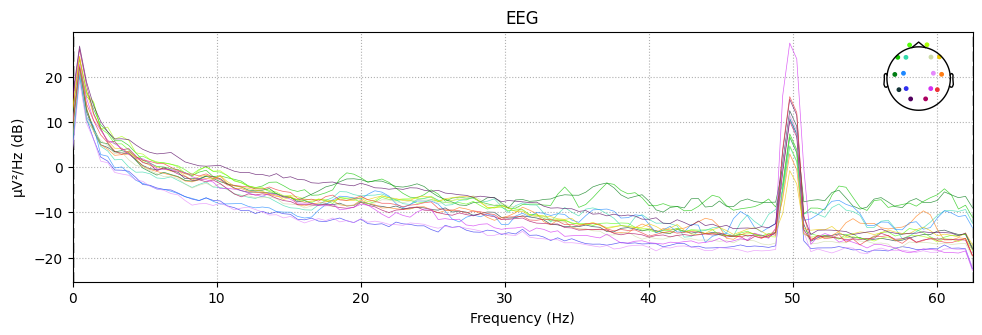

In [15]:
# Original one
df = pd.read_csv('/root/projects/CP/Projects/Signal/Converted_signal/Conv_exp01.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
raw = df_to_raw(df, convert=True)
raw.compute_psd().plot()

Creating RawArray with float64 data, n_channels=16, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   359.992 secs
Ready.
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 43 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lowe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


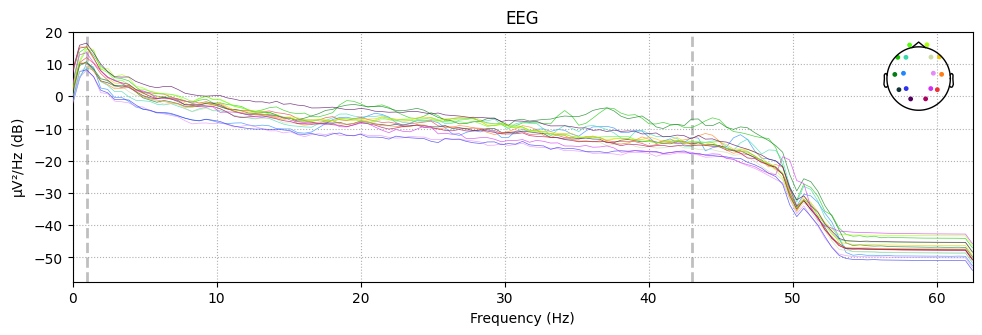

In [17]:
# After filter
df = pd.read_csv('/root/projects/CP/Projects/Signal/Converted_signal/Conv_exp01.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
test_raw = df_to_raw(df, convert=True)
test_raw.notch_filter(50)
test_raw.filter(1, 43)
test_raw.compute_psd().plot()